<a href="https://colab.research.google.com/github/RajaAbitha/RajaAbitha/blob/main/Assignment_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Load the Dataset
data=pd.read_csv('/content/insurance(1).csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


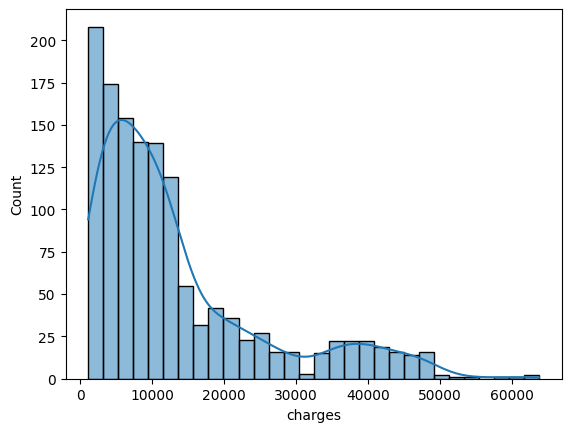

In [5]:
# Visualize distribution

sns.histplot(data['charges'] ,kde=True)
plt.show()

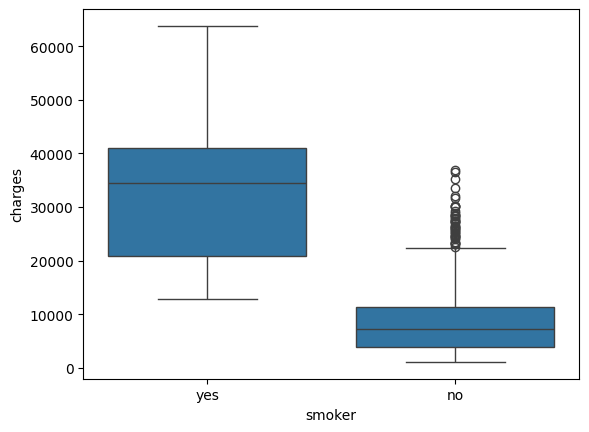

In [6]:
sns.boxplot(data=data, x='smoker', y='charges')

plt.show()

In [7]:
# Data preprocessing
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [8]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['sex']=le.fit_transform(data['sex'])
data['smoker']=le.fit_transform(data['smoker'])
data['region']=le.fit_transform(data['region'])


In [9]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [10]:
# Model development
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

x=data.drop('charges',axis=1)
y=data['charges']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [11]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [12]:
# Model Evalution
y_pred=model.predict(x_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
print('R2 Score:',r2)
print('MSE:',mse)

R2 Score: 0.7833463107364539
MSE: 33635210.431178406


In [14]:
# Model coeffient

coef_df = pd.DataFrame({'Feature': x.columns, 'Coefficient': model.coef_})
print(coef_df)


    Feature   Coefficient
0       age    257.056264
1       sex    -18.791457
2       bmi    335.781491
3  children    425.091456
4    smoker  23647.818096
5    region   -271.284266
